In [1]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#データの読み込み
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [2]:
#データの標準化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)

In [3]:
#主成分分析の実行
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_pca=pca.fit_transform(X_std)

In [5]:
#k-means法の実行
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,
          init="random",
          n_init=10,
          max_iter=300,
          tol=1e-04, 
          random_state=0)
#クラスタの数、セントロイドの初期値の決め方(デフォはk-means++),
#異なるセントロイドを用いての実行回数、一つのセントロイドを用いた時の繰り返し回数
#収束と判定するための相対的な許容誤差、セントロイドの初期化時の乱数生成器の状態

y_km=km.fit_predict(X_pca[:,0:2]) 
#第1,第2主成分からクラスラベルを予測

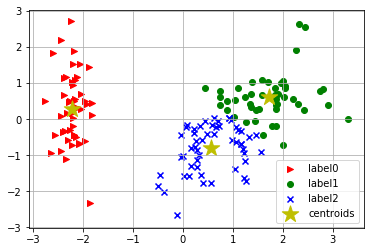

In [6]:
#クラスタリング結果をプロットする関数を定義
def kmeans_plot(n_clusters,km,X):
    y_km=km.fit_predict(X)
    for i,color,marker in zip(range(n_clusters),"rgbcm",">oxv"):
        plt.scatter(X[y_km==i,0],X[y_km==i,1],
                   color=color,marker=marker,label="label"+str(i))
    
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
               color="y",marker="*",label="centroids",s=300)
    plt.legend()
    plt.grid()
    plt.show()
    
#プロット
kmeans_plot(3,km,X_pca[:,[0,1]])

In [7]:
#SSEを格納するリストを用意
distortions=[]

#kの値を変えながらk-means法を実行し、SSEを格納していく
from sklearn.cluster import KMeans
for k in range(1,11):
    km=KMeans(n_clusters=k,init="random",
             n_init=10,max_iter=300,
             random_state=0)
    km.fit(X_pca[:,0:2])
    distortions.append(km.inertia_)

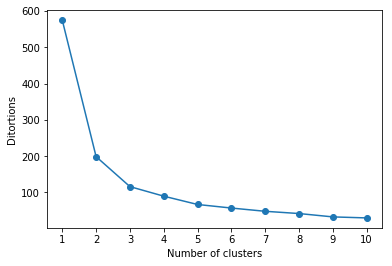

In [8]:
#SSEのプロット
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(np.arange(1,11,1))
plt.xlabel("Number of clusters")
plt.ylabel("Ditortions")
plt.show()

In [9]:
#クラスタリングの実行
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,
          init="random",
         n_init=10,
          max_iter=300,
         tol=1e-04,
          random_state=0)
y_km=km.fit_predict(X_pca[:,0:2])

In [10]:
#シルエット係数の確認
from sklearn.metrics import silhouette_samples
s=silhouette_samples(X_pca[:,0:2],y_km,metric="euclidean")
#"euclidean"はユークリッド距離

s

array([0.7437586 , 0.58954614, 0.69409517, 0.64122155, 0.73369006,
       0.61141915, 0.73511038, 0.74362968, 0.50135509, 0.65881326,
       0.68571458, 0.74237058, 0.59842831, 0.56327201, 0.56628677,
       0.4531917 , 0.62528033, 0.73935287, 0.59722791, 0.68463541,
       0.69664134, 0.70278381, 0.71659332, 0.65310985, 0.73907159,
       0.56794047, 0.72282242, 0.735419  , 0.73779078, 0.68998794,
       0.64387074, 0.67403197, 0.59277666, 0.53806428, 0.65881326,
       0.70266667, 0.70991422, 0.65881326, 0.57082221, 0.74027388,
       0.74561258, 0.07387569, 0.66820107, 0.70668142, 0.66918434,
       0.57672248, 0.68618886, 0.68751404, 0.69636903, 0.72662061,
       0.46212585, 0.21972257, 0.48205205, 0.56842335, 0.18797752,
       0.58705332, 0.29071226, 0.4273799 , 0.07138504, 0.61145173,
       0.43386335, 0.37349002, 0.55612643, 0.37048656, 0.5300063 ,
       0.26246967, 0.45841515, 0.61241816, 0.45906888, 0.61730613,
       0.10900922, 0.5350552 , 0.43356197, 0.50707618, 0.29358

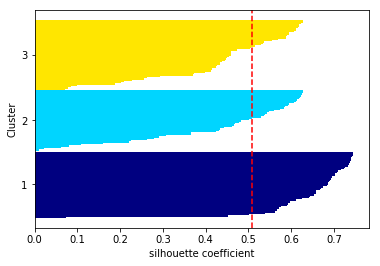

In [11]:
#シルエット図を出力する関数を定義
def draw_silhouettes(X,y_km):
    cluster_labels=np.unique(y_km)  
    #y_kmの要素を重複なくピックアップ
    
    n_clusters=cluster_labels.shape[0]
    #cluster_labelの要素数を数える
    
    s=silhouette_samples(X,y_km,metric="euclidean")
    y_axis_lower,y_axis_upper=0,0
    yticks=[]
    for i,label in enumerate(cluster_labels):
        label_s=s[y_km==label]
        label_s.sort()
        y_axis_upper+=len(label_s)
        #y_axis_upperをクラスタのサンプル数だけ引き上げる
        
        from matplotlib import cm
        color=cm.jet(float(i)/n_clusters)
        
        plt.barh(range(y_axis_lower,y_axis_upper),
                label_s,height=1.0,color=color)
        #バーを並べる範囲(y軸),バーの長さ,バー1本1本の厚み(固定),色
        
        yticks.append((y_axis_lower+y_axis_upper)/2)
        #メモリをバーの範囲の真ん中に設定
        
        y_axis_lower+=len(label_s)
        #次のクラスタのためにy_axis_lowerをクラスタのサンプル数だけ引き上げる
    
    plt.axvline(np.mean(s),color="red",linestyle="--")
    plt.yticks(yticks,cluster_labels+1)
    plt.ylabel("Cluster")
    plt.xlabel("silhouette coefficient")
    plt.show()
    
#シルエット図を出力
draw_silhouettes(X_pca[:,[0,1]],y_km)

In [12]:
#クラスタリングの実行
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,
         init="random",
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=0)
y_km=km.fit_predict(X_pca[:,[0,1]])

In [13]:
#シルエット係数の出力
from sklearn.metrics import silhouette_samples
s=silhouette_samples(X_pca[:,[0,1]],y_km,metric="euclidean")
s

array([0.77181721, 0.66475675, 0.7411025 , 0.70165051, 0.75971828,
       0.62958913, 0.76973624, 0.77599278, 0.59356395, 0.71611752,
       0.70912162, 0.7756659 , 0.6699705 , 0.63564418, 0.57923491,
       0.45376   , 0.6436615 , 0.76803924, 0.61689773, 0.70670434,
       0.73315303, 0.72712541, 0.74567398, 0.70435076, 0.77342906,
       0.64928806, 0.75869614, 0.76396671, 0.76994592, 0.7388284 ,
       0.70507987, 0.71334577, 0.60883654, 0.54829621, 0.71611752,
       0.74810324, 0.7389729 , 0.71611752, 0.64536155, 0.77270036,
       0.77397563, 0.27661495, 0.71870533, 0.7402808 , 0.69170665,
       0.65525175, 0.70832311, 0.73581167, 0.71987649, 0.7649712 ,
       0.59167416, 0.56663879, 0.64551596, 0.4310902 , 0.6867146 ,
       0.55008118, 0.54040931, 0.13540586, 0.66605974, 0.3913465 ,
       0.21197523, 0.56135835, 0.45841001, 0.63825802, 0.38006747,
       0.61020254, 0.53873266, 0.46347057, 0.55345505, 0.42480177,
       0.59608374, 0.58026328, 0.64601381, 0.61808898, 0.63106

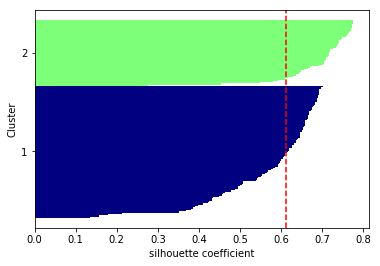

In [14]:
#シルエット図の出力(サンプル数が違いすぎることがわかる)
draw_silhouettes(X_pca[:,0:2],y_km)

In [ ]:
#クラスタリングの実行
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,
         init="random",
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=0)
y_km=km.fit_predict(X_pca[:,[0,1]])

In [18]:
#シルエット係数の出力
from sklearn.metrics import silhouette_samples
s=silhouette_samples(X_pca[:,[0,1]],y_km,metric="euclidean")
s

array([ 0.30868042,  0.6864963 ,  0.65292373,  0.7012196 ,  0.43414717,
        0.60096586,  0.34344005,  0.08449643,  0.61247127,  0.70191406,
        0.61428318,  0.24749239,  0.69231825,  0.59876516,  0.55666256,
        0.43511722,  0.60679374,  0.32731061,  0.58009026,  0.61234236,
        0.19263393,  0.59076444,  0.15309639,  0.22699433,  0.23982612,
        0.65191241,  0.02163611,  0.36818621,  0.04448494,  0.66358068,
        0.69836407,  0.19336276,  0.53378219,  0.50659065,  0.70191406,
        0.5946038 ,  0.46031652,  0.70191406,  0.64699529, -0.05274238,
        0.2545843 ,  0.2949723 ,  0.62811028,  0.2849721 ,  0.61966414,
        0.68030954,  0.6042865 ,  0.66020244,  0.60803206,  0.41090722,
        0.4807199 ,  0.26855712,  0.50667311,  0.57545989,  0.08862406,
        0.57424733,  0.32580503,  0.32095137,  0.01795719,  0.61611877,
        0.34912279,  0.32582674,  0.56169389,  0.30479538,  0.52066929,
        0.31505654,  0.4258135 ,  0.61149086,  0.45395981,  0.62

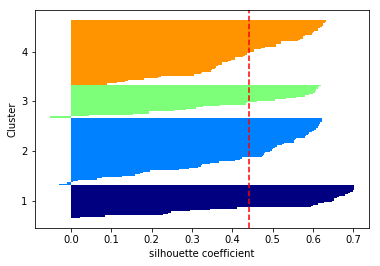

In [17]:
#シルエット図の出力(シルエット係数が小さすぎるものがあることがわかる)
draw_silhouettes(X_pca[:,0:2],y_km)